In [28]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
ins = pd.read_csv("insurance.csv")

In [30]:
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [32]:
ins.shape

(1338, 7)

In [34]:
ins_hot_encode = pd.get_dummies(ins)

In [35]:
X = ins_hot_encode.drop("charges", axis =1 )
y = ins['charges']

In [36]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [40]:
from sklearn.model_selection import train_test_split

In [44]:
train_x, test_x, train_y, test_y = train_test_split(
    X,y, test_size = 0.3, random_state=42
)

In [45]:
train_x.shape, train_y.shape

((936, 11), (936,))

In [48]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
                             tf.keras.layers.InputLayer(input_shape=(11,)),
                             tf.keras.layers.Dense(20),
                             tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

model.fit(train_x,train_y, epochs =100)

Epoch 1/100
30/30 [==============================] - 0s 1ms/step - loss: 8903.7012 - mae: 8903.7012
Epoch 2/100
30/30 [==============================] - 0s 1ms/step - loss: 7734.2773 - mae: 7734.2773
Epoch 3/100
30/30 [==============================] - 0s 1ms/step - loss: 7819.4829 - mae: 7819.4829
Epoch 4/100
30/30 [==============================] - 0s 1ms/step - loss: 7772.1011 - mae: 7772.1011
Epoch 5/100
30/30 [==============================] - 0s 2ms/step - loss: 7871.6714 - mae: 7871.6714
Epoch 6/100
30/30 [==============================] - 0s 1ms/step - loss: 8047.4204 - mae: 8047.4204
Epoch 7/100
30/30 [==============================] - 0s 1ms/step - loss: 7444.1465 - mae: 7444.1465
Epoch 8/100
30/30 [==============================] - 0s 1ms/step - loss: 7655.3384 - mae: 7655.3384
Epoch 9/100
30/30 [==============================] - 0s 1ms/step - loss: 7880.9702 - mae: 7880.9702
Epoch 10/100
30/30 [==============================] - 0s 1ms/step - loss: 7787.2036 - mae: 7787.2036

In [49]:
model.evaluate(test_x, test_y)

13/13 [==============================] - 0s 2ms/step - loss: 7652.2476 - mae: 7652.2476


[7652.24755859375, 7652.24755859375]

In [61]:
model_2 = tf.keras.Sequential([
                               tf.keras.layers.InputLayer(input_shape = (11,)),
                                                          tf.keras.layers.Dense(32, activation= "relu"),
                                                          tf.keras.layers.Dense(64, activation= "relu"),
                                                          tf.keras.layers.Dense(128, activation= "relu"),
                                                          tf.keras.layers.Dense(64, activation="relu"),
                                                          tf.keras.layers.Dense(32, activation="relu"),
                                                          tf.keras.layers.Dense(1)
])
model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = [tf.keras.losses.mae])

history = model_2.fit(train_x, train_y, epochs = 100, verbose = 0)

In [62]:
model_2.evaluate(test_x, test_y)

13/13 [==============================] - 0s 2ms/step - loss: 2025.9216 - mean_absolute_error: 2025.9216


[2025.921630859375, 2025.921630859375]

Text(0.5, 0, 'epochs')

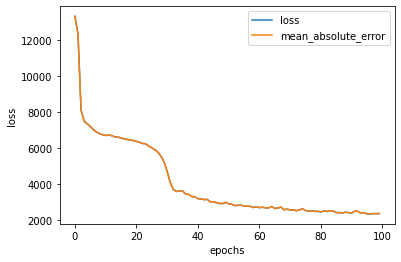

In [63]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [64]:
## Preprocessing(Normalization and standardization)

In [69]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [70]:
# Create a column transformer
ct= make_column_transformer((StandardScaler(), ['age', "bmi", 'children']),
                            (OneHotEncoder(handle_unknown="ignore"), ['sex','smoker','region']))
X= ins.drop("charges", axis =1)
y = ins['charges']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

ct.fit(x_train)
                            

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('standardscaler',
                                 StandardScaler(copy=True, with_mean=True,
                                                with_std=True),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='ignore',
                                               sparse=True),
                                 ['sex', 'smoker', 'region'])],
                  verbose=False)

In [71]:
x_train_normal= ct.transform(x_train)
x_test_normal = ct.transform(x_test)

In [74]:
model_3 = tf.keras.Sequential([
                               tf.keras.layers.InputLayer(input_shape = (11,)),
                                                          tf.keras.layers.Dense(32, activation= "relu"),
                                                          tf.keras.layers.Dense(64, activation= "relu"),
                                                          tf.keras.layers.Dense(128, activation= "relu"),
                                                          tf.keras.layers.Dense(64, activation="relu"),
                                                          tf.keras.layers.Dense(32, activation="relu"),
                                                          tf.keras.layers.Dense(1)
])
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = [tf.keras.losses.mae])

history = model_3.fit(x_train_normal, y_train, epochs = 100, verbose = 0)

In [75]:
model_3.evaluate(x_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1547.0481 - mean_absolute_error: 1547.0481


[1547.048095703125, 1547.048095703125]

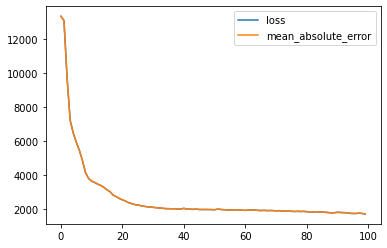

In [78]:
pd.DataFrame(history.history).plot()